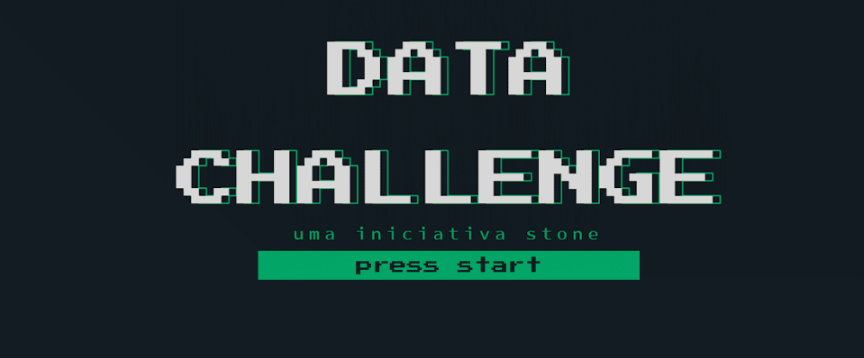

In [113]:
Image( '../../images/data_challenge.png')

# 0.0. IMPORTS

In [114]:
import pandas   as pd
import seaborn  as sns

from IPython.display       import Image
from IPython.core.display  import HTML

## 0.1. Aux Functions

In [115]:
# jupyter design
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    %config InlineBackend.figure_format = 'retina'

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = 20

    display(HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.4f}'.format
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2. Datasets limpos

In [116]:
df_portfolio_clientes = pd.read_csv( '../../datasets/datasets_transformados/portfolio_clientes_limpo.csv', index_col=0 )
df_portfolio_comunicados = pd.read_csv( '../../datasets/datasets_transformados/portfolio_comunicados_limpo.csv', index_col=0 )
df_portfolio_geral_tpv = pd.read_csv( '../../datasets/datasets_transformados/portfolio_geral_tpv_limpo.csv', index_col=0 )

# 1.0. Feature Engineering

## Portfolio Clientes

**Resumo das ações realizadas**

- **Features criadas:**

  - Região ( Norte, Nordeste, Centro-Oeste, Sudeste, Sul )

In [117]:
df_portfolio_clientes.head()

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
0,094aaed740bbd7fcddb6c678c18d883a,PJ,Caucaia,CE,Alimentação Rápida,Alimentação
1,eaade7915611fcdcbba747e3a83365c6,PF,Cidade Ocidental,GO,Lojas Diversas,Varejo
2,1f21958fd296f1b04a1f0c2658913856,MEI,Manaus,AM,Alimentação Rápida,Alimentação
3,fcdfe15db4520db1a1fe8b6a72878655,MEI,São Bernardo do Campo,SP,Alimentação Rápida,Alimentação
4,ba57e8837452b5e0114d7e273de039b4,PJ,Foz do Iguaçu,PR,Lojas Diversas,Supermercado/Farmácia


In [118]:
# região

norte = ['AC','AP','AM','PA','RO','RR','TO']
nordeste = ['AL','BA','CE','MA','PB','PI','PE','RN','SE']
centro_oeste = [ 'DF','GO','MT','MS' ]
sudeste = ['ES','MG','RJ','SP']
sul = ['PR','RS','SC']

df_portfolio_clientes['regiao'] = df_portfolio_clientes['estado'].apply( lambda x: 'Norte' if x in norte else 'Nordeste' 
                                                                                           if x in nordeste else 'Centro_Oeste'
                                                                                           if x in centro_oeste else 'Sudeste'
                                                                                           if x in sudeste else 'Sul' )

## Portfolio Comunicados

**Resumo das ações realizadas**

- **Features criadas:**

  - Coluna **'negativado'** binária onde **1** significa que esse contrato chegou na fase negativado em algum momento e **0** que não.

In [119]:
df_portfolio_comunicados.head()

,contrato_id,dt_ref_portfolio,data_acao,tipo_acao,acao,status
0,0d823ddff1839eb938dccc68586ae365,2021-01-16,2021-01-18,HSM,campanhaobservacao,LIDO
1,c2f8a21671dbaeaa4157e03682c639e1,2021-05-22,2021-05-24,HSM,campanhaobservacao,ENTREGUE
2,e19a222c233d46ff4984489c13aa1b98,2020-09-15,2020-09-15,HSM,campanhaobservacao,NAO ENTREGUE
3,c24fc7630fe5b89928ba9478c2cdd9b2,2021-07-20,2021-07-20,HSM,campanhaobservacao,NAO ENTREGUE
4,0abe9c2f21e941f2bd3b086277e33ebc,2020-12-26,2020-12-28,HSM,campanhaobservacao,ENTREGUE


In [120]:
# negativado -> ( negativaçao - 1 ) / ( não negativação - 0 )
df_negativados = df_portfolio_comunicados.loc[df_comunicados['acao'] == 'campanhanegativacao' ]
lista_negativados = df_negativados['contrato_id'].tolist()

df_portfolio_comunicados['negativado'] = df_portfolio_comunicados['contrato_id'].apply( lambda x: 0 if x in lista_negativados else 1 )

## Portfolio Geral + TPV

**Resumo das ações realizadas**

- **Features criadas:**

  - Coluna **'settled'** binária onde **1** vai representar que o contrato foi quitado em algum omemento, e **0** que nunca foi quitado.
  - Dia da semana dt_ref_portfolio
  - Dia dt_ref_portfolio
  - Semana do ano dt_ref_portfolio
  - Mês dt_ref_portfolio
  - Trimestre dt_ref_portfolio
  - Ano dt_ref_portfolio

In [122]:
df_portfolio_geral_tpv.head()

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,vlr_desembolsado,vlr_tarifa,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao,qtd_transacoes,vlr_tpv
3,4207c25cdd13aba5a05ae348e889d798,2022-03-01,2021-03-01,9c1dc4403f8a4833bd58eea3ee85c917,Active,2021-03-01,2021-03-03,2022-06-01,2023-06-01,25,"14,588.0100",145.8801,0.0479,0.0016,0.0192,0.0000,43.0600,"9,469.4700",461.9600,20,82,0,0.0000,0.0000
4,7dfdca96b6ff0dd844e5e130aee88b30,2022-03-01,2020-11-01,3b6951df3075979c99a4dfd9f93efd38,Active,2020-10-31,2020-11-04,2022-01-31,2023-01-31,25,"68,400.0000",684.0000,0.0479,0.0016,0.1200,0.0000,200.0900,"57,783.5500",0.0000,134,167,0,0.0000,0.0000
5,a3aecc6b029cc77dd867e0e24e2d616f,2022-03-01,2020-12-01,9740eda3d6190add5703cd2dd280023c,Active,2020-12-18,2020-12-22,2022-06-18,2023-06-18,30,"36,380.2500",363.8025,0.0419,0.0014,0.0120,0.0000,89.9900,"36,764.2300","2,745.7300",196,250,0,0.0000,0.0000
6,3db18b4a0e36098c1ef1ee87f1491d84,2022-03-01,2020-07-01,c2766a0c65d1df592aeb4797efc893e0,Active,2020-07-08,2020-07-10,2021-10-08,2022-10-08,25,"21,546.0000",215.4600,0.1019,0.0033,0.1200,0.0000,82.6100,"66,762.4000",0.0000,286,594,0,0.0000,0.0000
7,b4658a6d9785c527297cd14762240f09,2022-03-01,2020-12-01,d61e4f520ee20e9c693c9c4808d19f55,Active,2020-12-04,2020-12-08,2022-03-04,2023-03-04,25,"44,769.5100",447.6951,0.0479,0.0016,0.0144,0.0000,131.8900,"20,054.1300",0.0000,76,76,0,0.0000,0.0000


## Convertendo colunas de data pra datetime pois quando se exporta pra csv elas voltam para float

In [123]:
# dt_ref_portfolio
df_portfolio_geral_tpv['dt_ref_portfolio']= pd.to_datetime( df_portfolio_geral_tpv['dt_ref_portfolio'] )

# safra
df_portfolio_geral_tpv['safra']= pd.to_datetime( df_portfolio_geral_tpv['safra'], format='%Y-%m' )

# dt_contrato
df_portfolio_geral_tpv['dt_contrato']= pd.to_datetime( df_portfolio_geral_tpv['dt_contrato'] )

# dt_desembolso
df_portfolio_geral_tpv['dt_desembolso']= pd.to_datetime( df_portfolio_geral_tpv['dt_desembolso'] )

# dt_vencimento
df_portfolio_geral_tpv['dt_vencimento']= pd.to_datetime( df_portfolio_geral_tpv['dt_vencimento'] )

# dt_wo
df_portfolio_geral_tpv['dt_wo']= pd.to_datetime( df_portfolio_geral_tpv['dt_wo'] )

## Features

In [124]:
# settled (1) - not settled (0)
df_settled = df_portfolio_geral_tpv.loc[df_portfolio_geral_tpv['status_contrato'] == 'Settled' ]
settled_lista = df_settled['contrato_id'].tolist()

df_portfolio_geral_tpv['settled'] = df_portfolio_geral_tpv['contrato_id'].apply( lambda x: 1 if x in settled_lista else 0 )

# dt ref portfolio dia da semana
df_portfolio_geral_tpv['dt_ref_portfolio_dia_da_semana'] = df_portfolio_geral_tpv['dt_ref_portfolio'].dt.dayofweek

# dt ref portfolio dia
df_portfolio_geral_tpv['dt_ref_portfolio_dia'] = df_portfolio_geral_tpv['dt_ref_portfolio'].dt.day

# dt ref portfolio semana do ano
df_portfolio_geral_tpv['dt_ref_portfolio_semana_do_ano'] = df_portfolio_geral_tpv['dt_ref_portfolio'].dt.weekofyear

# dt ref portfolio mês
df_portfolio_geral_tpv['dt_ref_portfolio_mes'] = df_portfolio_geral_tpv['dt_ref_portfolio'].dt.month

# dt ref portfolio trimestre
df_portfolio_geral_tpv['dt_ref_portfolio_trimestre'] = df_portfolio_geral_tpv['dt_ref_portfolio'].dt.quarter

# dt ref portfolio ano
df_portfolio_geral_tpv['dt_ref_portfolio_ano'] = df_portfolio_geral_tpv['dt_ref_portfolio'].dt.year

C:\Users\mathe\AppData\Local\Temp\ipykernel_14188\4246370221.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_portfolio_geral_tpv['dt_ref_portfolio_semana_do_ano'] = df_portfolio_geral_tpv['dt_ref_portfolio'].dt.weekofyear


## Exportando datasets com novas features

In [125]:
# Exportando datasets com novas features pra csv 
df_portfolio_clientes.to_csv('../../datasets/datasets_transformados/portfolio_clientes_final.csv', index=False )
df_portfolio_comunicados.to_csv('../../datasets/datasets_transformados/portfolio_comunicados_final.csv', index=False )
df_portfolio_geral_tpv.to_csv('../../datasets/datasets_transformados/portfolio_geral_tpv_final.csv', index=False )